

---


### **CREDIT RISK ANALYSIS – CASE STUDY**



---



### **Importing Libraries**

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as ssw
from scipy.stats import chi2_contingency
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest

### **Reading Datasets**

In [3]:
df1 = pd.read_csv('/content/credit_risk_applicants.csv')

In [4]:
df2 = pd.read_csv('/content/credit_risk_previous_loans.csv')

### **Getting info of datasets**

In [5]:
df1.shape

(307511, 122)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df2.shape

(1670214, 37)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## **1. Data Cleaning**

### **a) Identify missing values**

*   Counting null values of each column and sorting it as per the counts in descending order. Also converting the series into a dataframe


In [11]:
df1.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,COMMONAREA_AVG,214865
1,COMMONAREA_MODE,214865
2,COMMONAREA_MEDI,214865
3,NONLIVINGAPARTMENTS_MEDI,213514
4,NONLIVINGAPARTMENTS_MODE,213514
...,...,...
117,FLAG_DOCUMENT_16,0
118,FLAG_DOCUMENT_15,0
119,FLAG_DOCUMENT_14,0
120,FLAG_DOCUMENT_20,0


In [12]:
(df1.isnull().mean()*100).sort_values(ascending=False).reset_index()

,index,0
0,COMMONAREA_AVG,69.872297
1,COMMONAREA_MODE,69.872297
2,COMMONAREA_MEDI,69.872297
3,NONLIVINGAPARTMENTS_MEDI,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
117,FLAG_DOCUMENT_16,0.000000
118,FLAG_DOCUMENT_15,0.000000
119,FLAG_DOCUMENT_14,0.000000
120,FLAG_DOCUMENT_20,0.000000


In [13]:
df2.isnull().sum().sort_values(ascending=False)

,0
RATE_INTEREST_PRIVILEGED,1664263
RATE_INTEREST_PRIMARY,1664263
AMT_DOWN_PAYMENT,895844
RATE_DOWN_PAYMENT,895844
NAME_TYPE_SUITE,820405
DAYS_TERMINATION,673065
DAYS_FIRST_DRAWING,673065
DAYS_FIRST_DUE,673065
DAYS_LAST_DUE_1ST_VERSION,673065
DAYS_LAST_DUE,673065


In [14]:
(df2.isnull().mean()*100).sort_values(ascending=False)

,0
RATE_INTEREST_PRIVILEGED,99.643698
RATE_INTEREST_PRIMARY,99.643698
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
NAME_TYPE_SUITE,49.119754
DAYS_TERMINATION,40.298129
DAYS_FIRST_DRAWING,40.298129
DAYS_FIRST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_LAST_DUE,40.298129




*   Listing all columns whose percentage of null values are > 40 % and then dropping them down.

*   More than 40% of missing data introduces high uncertainty. 40 % threshold provides best balance for retaining useful insights. So, dropping those columns will improve the dataset quality.





In [15]:
list1 = list(df1.columns[(df1.isnull().mean()>=0.40)])

In [16]:
list1

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [17]:
df1 = df1.drop(columns=list1)

In [18]:
list2 = list(df2.columns[(df2.isnull().mean()>=0.40)])

In [19]:
list2

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [20]:
df2 = df2.drop(columns=list2)



*   Checking datatypes of remaining columns



In [21]:
df1.dtypes.reset_index()

,index,0
0,SK_ID_CURR,int64
1,TARGET,int64
2,NAME_CONTRACT_TYPE,object
3,CODE_GENDER,object
4,FLAG_OWN_CAR,object
...,...,...
68,AMT_REQ_CREDIT_BUREAU_DAY,float64
69,AMT_REQ_CREDIT_BUREAU_WEEK,float64
70,AMT_REQ_CREDIT_BUREAU_MON,float64
71,AMT_REQ_CREDIT_BUREAU_QRT,float64


In [22]:
df2.dtypes

,0
SK_ID_PREV,int64
SK_ID_CURR,int64
NAME_CONTRACT_TYPE,object
AMT_ANNUITY,float64
AMT_APPLICATION,float64
AMT_CREDIT,float64
AMT_GOODS_PRICE,float64
WEEKDAY_APPR_PROCESS_START,object
HOUR_APPR_PROCESS_START,int64
FLAG_LAST_APPL_PER_CONTRACT,object


### b) **Handling missing values**



*   Filling continuous numerical columns using median



In [23]:
cont1_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

In [24]:
df1[cont1_cols] = df1[cont1_cols].fillna(df1[cont1_cols].median())

In [25]:
cont2_cols = [
    i for i in df2.columns
    if df2[i].dtype == 'float64'        # keeps only columns with continuous data
    and not i.startswith('CNT')
]

In [26]:
cont2_cols

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

In [27]:
df2[cont2_cols] = df2[cont2_cols].fillna(df2[cont2_cols].median())

* Filling discrete numerical columns using mode

In [28]:
num1_cols = df1.select_dtypes(include=['int64','float64']).columns.tolist()

In [29]:
disc1_cols =  [i for i in num1_cols if i not in cont1_cols]

In [30]:
df1[disc1_cols] = df1[disc1_cols].fillna(df1[disc1_cols].mode().iloc[0])

In [31]:
num2_cols = df2.select_dtypes(include=['int64','float64']).columns.tolist()

In [32]:
disc2_cols =  [i for i in num2_cols if i not in cont2_cols]

In [33]:
df2[disc2_cols] = df2[disc2_cols].fillna(df2[disc2_cols].mode().iloc[0])



*   Filling categorical columns with mode



In [34]:
cat1_cols = df1.select_dtypes(include=['object']).columns
cat1_cols = cat1_cols.drop('OCCUPATION_TYPE')
df1[cat1_cols] = df1[cat1_cols].fillna(df1[cat1_cols].mode().iloc[0])

In [35]:
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].fillna('Unknown')

In [36]:
cat2_cols = df2.select_dtypes(include=['object']).columns
df2[cat2_cols] = df2[cat2_cols].fillna(df2[cat2_cols].mode().iloc[0])



*   Checking missing values again after filling them



In [37]:
df1.isnull().sum().reset_index()

,index,0
0,SK_ID_CURR,0
1,TARGET,0
2,NAME_CONTRACT_TYPE,0
3,CODE_GENDER,0
4,FLAG_OWN_CAR,0
...,...,...
68,AMT_REQ_CREDIT_BUREAU_DAY,0
69,AMT_REQ_CREDIT_BUREAU_WEEK,0
70,AMT_REQ_CREDIT_BUREAU_MON,0
71,AMT_REQ_CREDIT_BUREAU_QRT,0


In [38]:
df2.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,0
AMT_APPLICATION,0
AMT_CREDIT,0
AMT_GOODS_PRICE,0
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0
FLAG_LAST_APPL_PER_CONTRACT,0


### **c) Checking duplicate rows**

In [39]:
df1.duplicated().sum()

np.int64(0)

In [40]:
df2.duplicated().sum()

np.int64(0)

### **d) Identifying Outliers**

Outlier analysis only on continuous numeric columns

In [41]:
def outlier_summary(df, columns):
    summary = []
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[i] < lower) | (df[i] > upper)][i].count()
        outlier_pct = outliers / len(df) * 100
        summary.append([i, q1, q3, lower, upper, outliers, round(outlier_pct, 2)])
    return pd.DataFrame(summary, columns=['Column', 'Q1', 'Q3', 'Lower Bound', 'Upper Bound', 'Outlier Count', 'Outlier %'])

In [42]:
outlier_summary(df1,cont1_cols)

,Column,Q1,Q3,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,AMT_INCOME_TOTAL,112500.000000,202500.000000,-22500.000000,3.375000e+05,14035,4.56
1,AMT_CREDIT,270000.000000,808650.000000,-537975.000000,1.616625e+06,6562,2.13
2,AMT_ANNUITY,16524.000000,34596.000000,-10584.000000,6.170400e+04,7504,2.44
3,AMT_GOODS_PRICE,238500.000000,679500.000000,-423000.000000,1.341000e+06,14728,4.79
4,REGION_POPULATION_RELATIVE,0.010006,0.028663,-0.017980,5.664850e-02,8412,2.74
5,EXT_SOURCE_2,0.392974,0.663422,-0.012698,1.069094e+00,0,0.00
6,EXT_SOURCE_3,0.417100,0.636376,0.088185,9.652909e-01,4313,1.40


In loan datasets, outliers are not errors, they represent real customers
* Very high income --> rich customer
* Very large credit amounts --> big loans
* High annuity --> high EMI


Handling Outliers:

---

1. Monetary Variables

(AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE)
*   Outliers appeared in only 2–5% of the values.
*   Rich customers are normal in credit datasets
*   Removing them would bias toward low income borrowers
*   So we do not remove any outliers

2. REGION_POPULATION_RELATIVE
*   The ouliers of these columns simple represent very high or low population density regions and are not errors
*   We are not removing the outliers here

3. EXT_SOURCE_2 and EXT_SOURCE_3
*  These are normalized credit scores taken from external bureaus
* These scores are highly important for predicting default
*  Outliers are mild and we are keeping them








In [43]:
outlier_summary(df2,cont2_cols)

,Column,Q1,Q3,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,AMT_ANNUITY,7547.09625,16824.02625,-6368.29875,30739.42125,162620,9.74
1,AMT_APPLICATION,18720.00000,180360.00000,-223740.00000,422820.00000,208019,12.45
2,AMT_CREDIT,24160.50000,216418.50000,-264226.50000,504805.50000,179989,10.78
3,AMT_GOODS_PRICE,67500.00000,180405.00000,-101857.50000,349762.50000,236035,14.13


Handling Outliers:



---



1. Monetary Variables
*  These variables showed moderate outlier % which is expected in financial datasets.
* Some customers apply small loand aand some for very large loans. Some buy low value goods, some buy expensive ones.
* So it is normal to see high variation and high-value outliers
*  To avoid losing valid high-value loan applications, we do not remove outliers

### **e) Detecting anomalies**

In [44]:
df1['DAYS_EMPLOYED'].value_counts()

,count
DAYS_EMPLOYED,
365243,55374
-200,156
-224,152
-230,151
-199,151
...,...
-11471,1
-12878,1
-10573,1


* As we can see 365243 is +ve and represents over 1000 years of employment (365,243 ÷ 365 ≈ 1000 years) which is impossible
* This is used as a placeholder for missing employment data. So we will replace this with NaN

In [45]:
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].replace(365243, np.nan)

## **2. Exploratory Data Analysis (EDA)**

### **a) Univariate Analysis**

**INCOME**

In [46]:
df1['AMT_INCOME_TOTAL'].describe()

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08




*   As mean > median, Income is heavily right skewed which means few extremely high-income customers pull the average up
*   Majority earn b/w approx 100,000 - 200,000
*   Maximum income is extremely high (117 million)



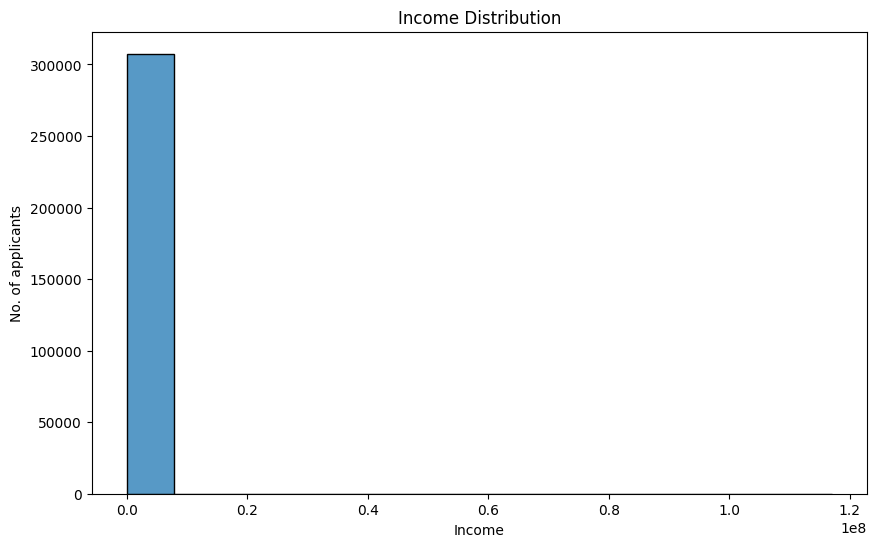

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(df1['AMT_INCOME_TOTAL'],bins=15)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("No. of applicants")
plt.show()



*   X-axis: Income values range from 0 to more than 100 million.
*   The distribution is highly right-skewed.
*   Almost all applicants have incomes below 1,000,000
*   There are extreme outliers that distort the scale.
*   Only a very tiny number of applicants have ultra-high incomes (10M–117M), so those values stretch the x-axis heavily.
*   Because of the huge range, the main pattern is not visible clearly.



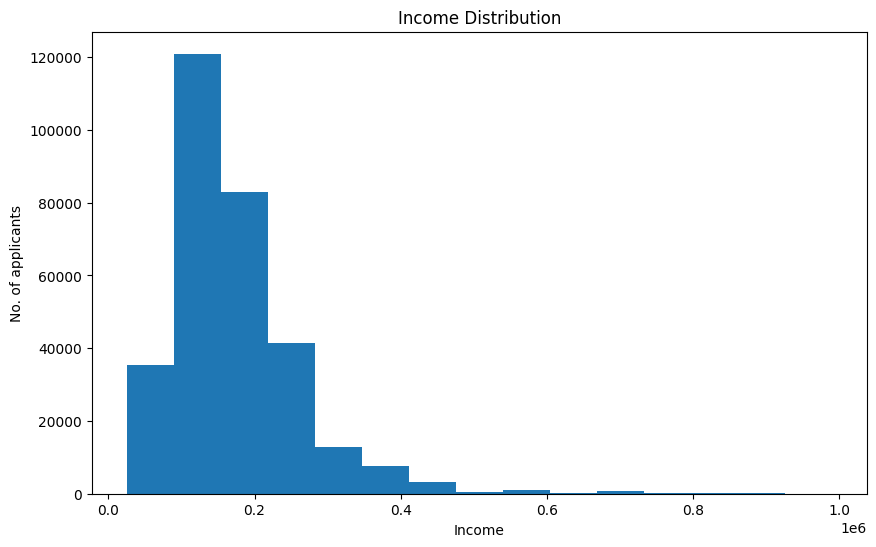

In [48]:
income_short = df1[df1['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL']
plt.figure(figsize=(10,6))
plt.hist(income_short, bins=15)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("No. of applicants")
plt.show()


*  To improve visualization, we filtered the data to include only applicants with income < 1,000,000.
*  This removes extreme values and allows us to see the true shape of the distribution
*  Most people are low-to-middle income who earn b/w 100,000 and 250,000
* Majority have moderate incomes, minority have very high earnings






**CREDIT AMOUNT**

In [49]:
df1['AMT_CREDIT'].describe()

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


*  Mean > Median, credit amount is right-skewed which means a few very large loans pull the average upward
*  Most customers take smaller loans, while only a small proportion take high-value loans
*  Min credit and max credit indicates applicants take both small and large loans (45,000 to 4,050,000)

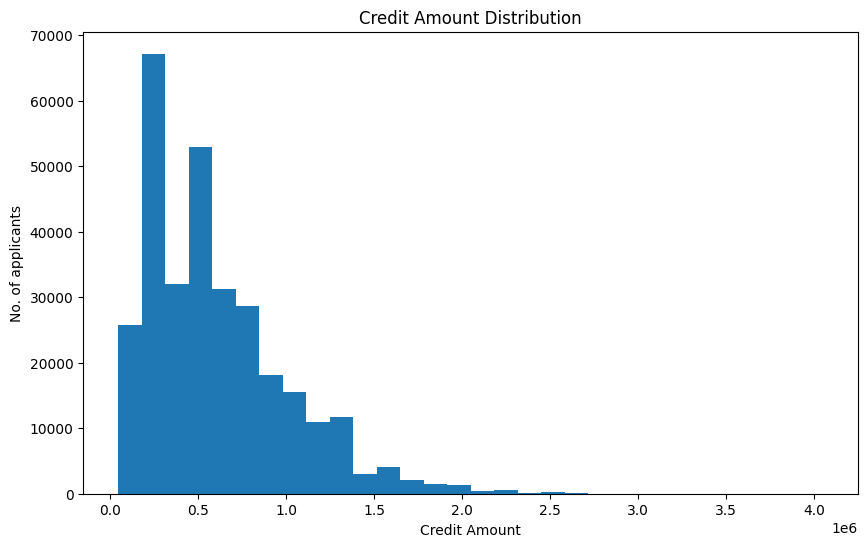

In [50]:
plt.figure(figsize=(10,6))
plt.hist(df1['AMT_CREDIT'], bins=30)
plt.title("Credit Amount Distribution")
plt.xlabel("Credit Amount")
plt.ylabel("No. of applicants")
plt.show()

*  The frequency decreases as credit increases
*  Most customers request credit around 200,000–600,000, these are medium-sized loans
*  Most loans are small-medium sized and only a few large loans

**AGE**

* DAYS_BIRTH is -ve because it counts backward from application date

In [51]:
# Creating age column from days of birth
df1['AGE_YEARS'] = -df1['DAYS_BIRTH'] / 365.25

In [52]:
df1['AGE_YEARS'].describe()

,AGE_YEARS
count,307511.000000
mean,43.906900
std,11.947950
min,20.503765
25%,33.984942
50%,43.121150
75%,53.886379
max,69.073238


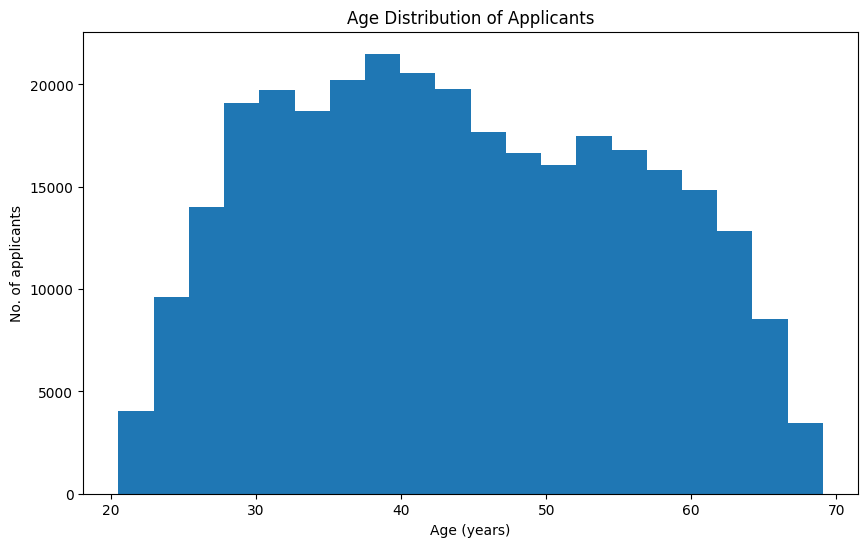

In [53]:
plt.figure(figsize=(10,6))
plt.hist(df1['AGE_YEARS'], bins=20)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age (years)")
plt.ylabel("No. of applicants")
plt.show()



*   The distribution is approximately symmetric
*   Most applicants are between 30 and 55 years old
*   Very few applicants are younger than 25 or older than 65



**ANNUITY** : loan payment per installment

In [54]:
df1['AMT_ANNUITY'].describe()

,AMT_ANNUITY
count,307511.000000
mean,27108.487841
std,14493.461065
min,1615.500000
25%,16524.000000
50%,24903.000000
75%,34596.000000
max,258025.500000


* Mean > Median, distribution is right-skewed which means a small no. of customers have extremely high annuity payments
* Annuity depends directly on loan amount × duration × interest rate


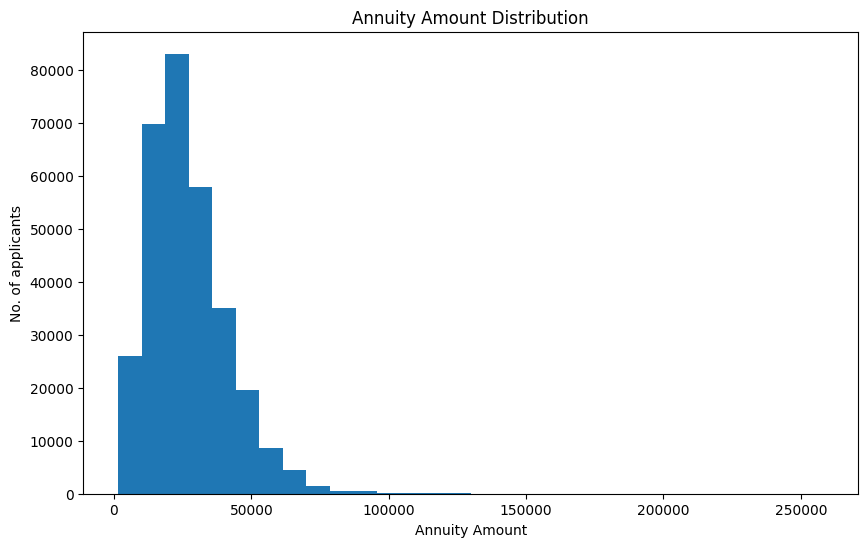

In [55]:
plt.figure(figsize=(10,6))
plt.hist(df1['AMT_ANNUITY'], bins=30)
plt.title("Annuity Amount Distribution")
plt.xlabel("Annuity Amount")
plt.ylabel("No. of applicants")
plt.show()

*  Distribution is right-skewed
*  Most annuity amounts fall between 10,000 and 40,000
* Most customers take medium-sized loans that result in moderate EMI amounts
*  Long right tail represents a few applicants with very large annuity payments

**EDUCATION**

In [56]:
df1['NAME_EDUCATION_TYPE'].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,218391
Higher education,74863
Incomplete higher,10277
Lower secondary,3816
Academic degree,164


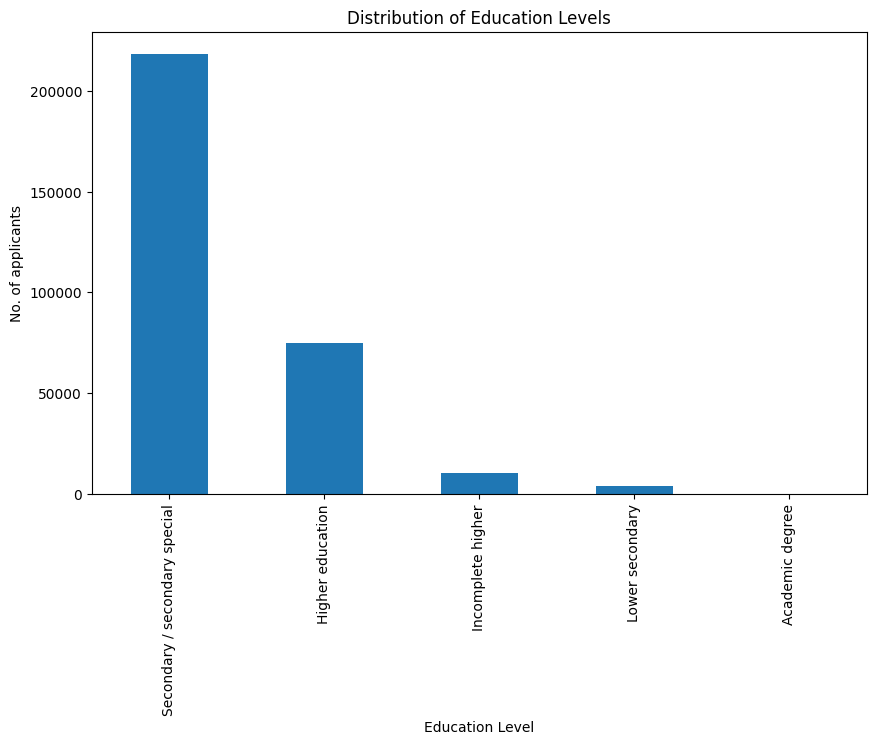

In [57]:
plt.figure(figsize=(10,6))
df1['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("No. of applicants")
plt.show()



*  Majority of applicants have “Secondary / secondary special” education.
*  Second highest group is “Higher education”
*  Lower education customers tend to take smaller loans
*  Higher education customers might take larger loans



**EMPLOYMENT LENGTH**

In [58]:
df1['EMPLOY_YEARS'] = -(df1['DAYS_EMPLOYED'] / 365.25)

In [59]:
df1['EMPLOY_YEARS'].describe()

,EMPLOY_YEARS
count,252137.000000
mean,6.527500
std,6.402081
min,-0.000000
25%,2.099932
50%,4.511978
75%,8.692676
max,49.040383


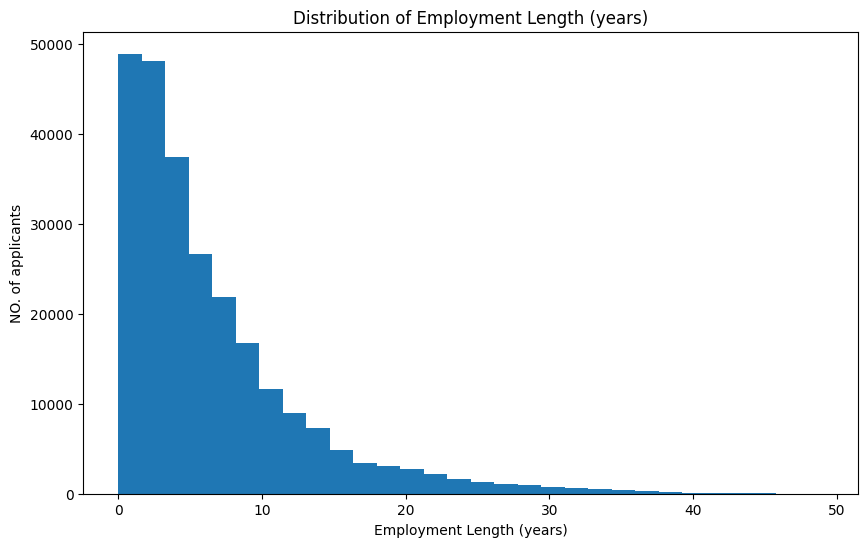

In [60]:
plt.figure(figsize=(10,6))
plt.hist(df1['EMPLOY_YEARS'].dropna(), bins=30)
plt.title("Distribution of Employment Length (years)")
plt.xlabel("Employment Length (years)")
plt.ylabel("NO. of applicants")
plt.show()

*  Distribution is right-skewed
* Majority have 0–10 years of employment
*  Many applicants who are young workers have low employment experience
*  Very few have more than 25 years of experience due to retirement
*  Employment length is a strong indicator of income stability.

Short experience --> higher risk of job change, lower credit reliability

Long experience --> more stable employment, lower credit risk

### **b) Bivariate Analysis**


In TARGET column
*   1 = Defaulter (fails to repay loan)
*   0 = Non-defaulter (pays loan on time)



**CREDIT AMOUNT**

In [61]:
df1.groupby('TARGET')['AMT_CREDIT']

In [62]:
df1.groupby('TARGET')['AMT_CREDIT'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,602648.282002,406845.907710,45000.0,270000.0,517788.0,810000.0,4050000.0
1,24825.0,557778.527674,346433.235646,45000.0,284400.0,497520.0,733315.5,4027680.0


*  Credit amount does not strongly differentiate defaulters from non-defaulters
*  Both groups borrow similar loan amounts and the median & mean credit amounts are slightly lower for defaulters

AMT_CREDIT --> continuous

TARGET (0/1) --> categorical

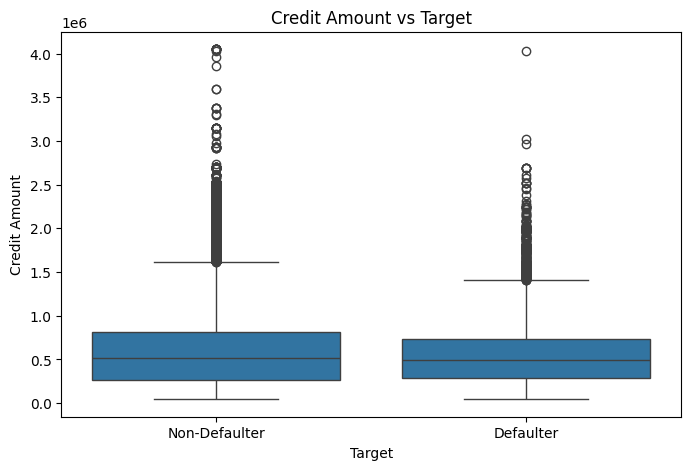

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1, x='TARGET', y='AMT_CREDIT')
plt.title("Credit Amount vs Target")
plt.xlabel("Target")
plt.ylabel("Credit Amount")
plt.xticks([0, 1], ["Non-Defaulter", "Defaulter"])
plt.show()

**INCOME GROUPS**

NAME_INCOME_TYPE --> categories

TARGET --> categories (0/1)

In [64]:
a = pd.crosstab(df1['NAME_INCOME_TYPE'], df1['TARGET'])

In [65]:
a

TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,10,0
Commercial associate,66257,5360
Maternity leave,3,2
Pensioner,52380,2982
State servant,20454,1249
Student,18,0
Unemployed,14,8
Working,143550,15224


In [66]:
a['Total'] = a[0] + a[1]
a['Default_Rate'] = (a[1] / a['Total']) * 100

In [67]:
crosstab_sorted = a.sort_values('Default_Rate', ascending=False)

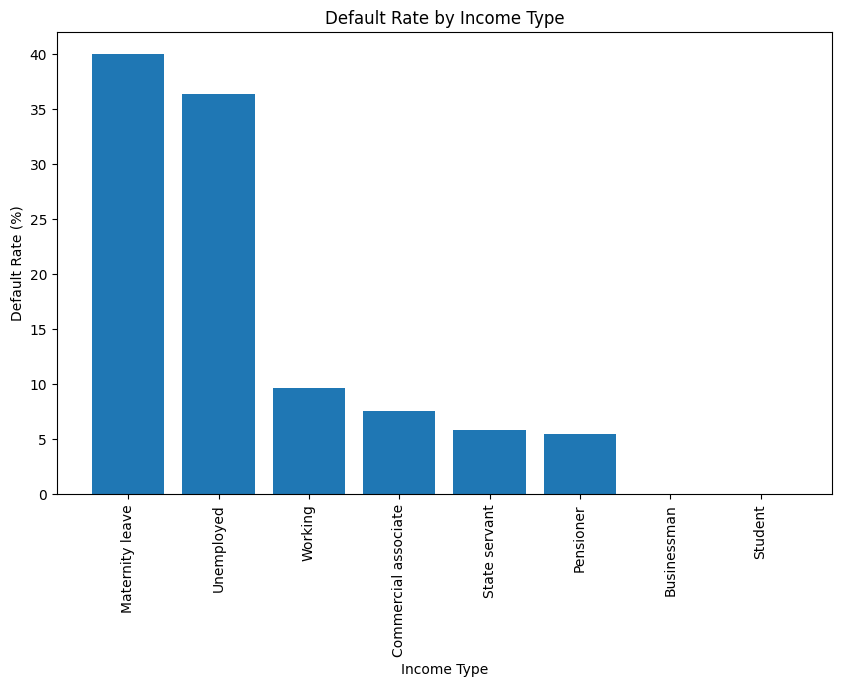

In [68]:
plt.figure(figsize=(10,6))
plt.bar(crosstab_sorted.index, crosstab_sorted['Default_Rate'])
plt.title("Default Rate by Income Type")
plt.xlabel("Income Type")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=90)
plt.show()

Maternity Leave
* Highest Default Rate and very small group (only 5 applicants)
* Indicates financial instability during maternity period

Unemployed
* Very High Default Rate
* Also a very small group (22 applicants)
* Lack of steady income, high credit risk

Working Class
* Default Rate ~ 10%
* Largest applicant group and they show a higher than average default rate
* Individuals have higher financial commitments & limited savings

Commercial Associates
* Moderate Default Rate (~7.5%)
* Generally self-employed or business-related income
* Income is variable, causing slightly higher risk but still safer than the working group

Pensioners & State Servers
* Low Default Rate
* Very stable income through government
* Among large groups, this is the safest category

**HOUSING TYPE**

NAME_HOUSING_TYPE --> categories

TARGET --> categories (0/1)

In [69]:
a = pd.crosstab(df1['NAME_HOUSING_TYPE'], df1['TARGET'])

In [70]:
a

TARGET,0,1
NAME_HOUSING_TYPE,,
Co-op apartment,1033,89
House / apartment,251596,21272
Municipal apartment,10228,955
Office apartment,2445,172
Rented apartment,4280,601
With parents,13104,1736


In [71]:
a['Total'] = a[0] + a[1]
a['Default_Rate'] = (a[1] / a['Total']) * 100

In [72]:
crosstab_sorted = a.sort_values('Default_Rate', ascending=False)

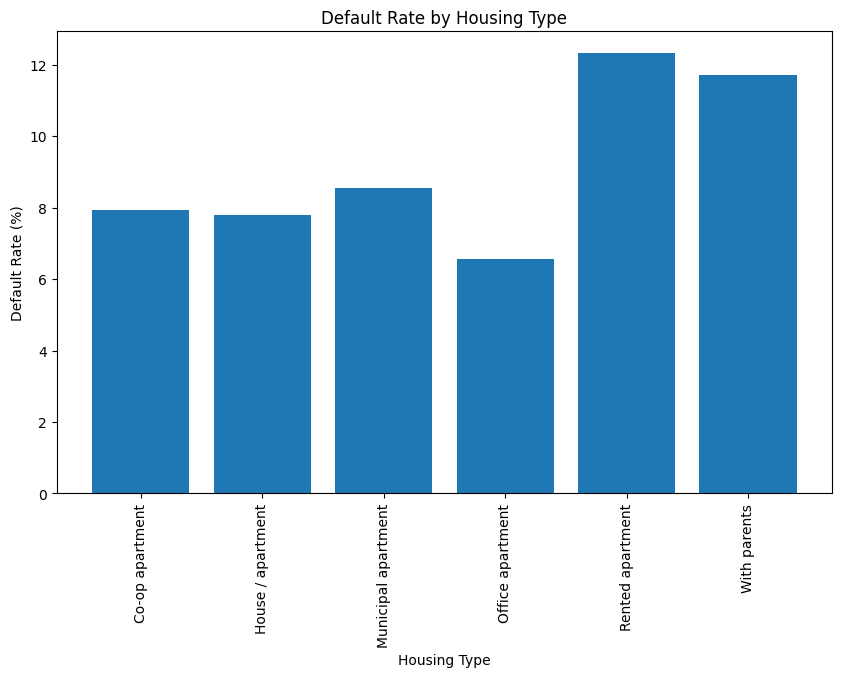

In [73]:
plt.figure(figsize=(10,6))
plt.bar(a.index, a['Default_Rate'])
plt.title("Default Rate by Housing Type")
plt.xlabel("Housing Type")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=90)
plt.show()

Rented Apartment
* Highest Default Rate
* Renting often indicates: Lower financial stability, Higher monthly expenses, Less asset ownership
* This group is high-risk

Living With Parents
* Are younger, have less financial independence
* This group also shows relatively high default risk

Municipal Apartments
* Moderate default risk due to lower income group

Applicants living in regular houses or office apartments show lower default rates, indicating stronger financial background

**OCCUPATION TYPE**

OCCUPATION_TYPE --> categories

TARGET --> categories (0/1)

In [74]:
a = pd.crosstab(df1['OCCUPATION_TYPE'], df1['TARGET'])

In [75]:
a

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,9339,474
Cleaning staff,4206,447
Cooking staff,5325,621
Core staff,25832,1738
Drivers,16496,2107
HR staff,527,36
High skill tech staff,10679,701
IT staff,492,34
Laborers,49348,5838


In [76]:
a['Total'] = a[0] + a[1]
a['Default_Rate'] = (a[1] / a['Total']) * 100

In [77]:
crosstab_sorted = a.sort_values('Default_Rate', ascending=False)

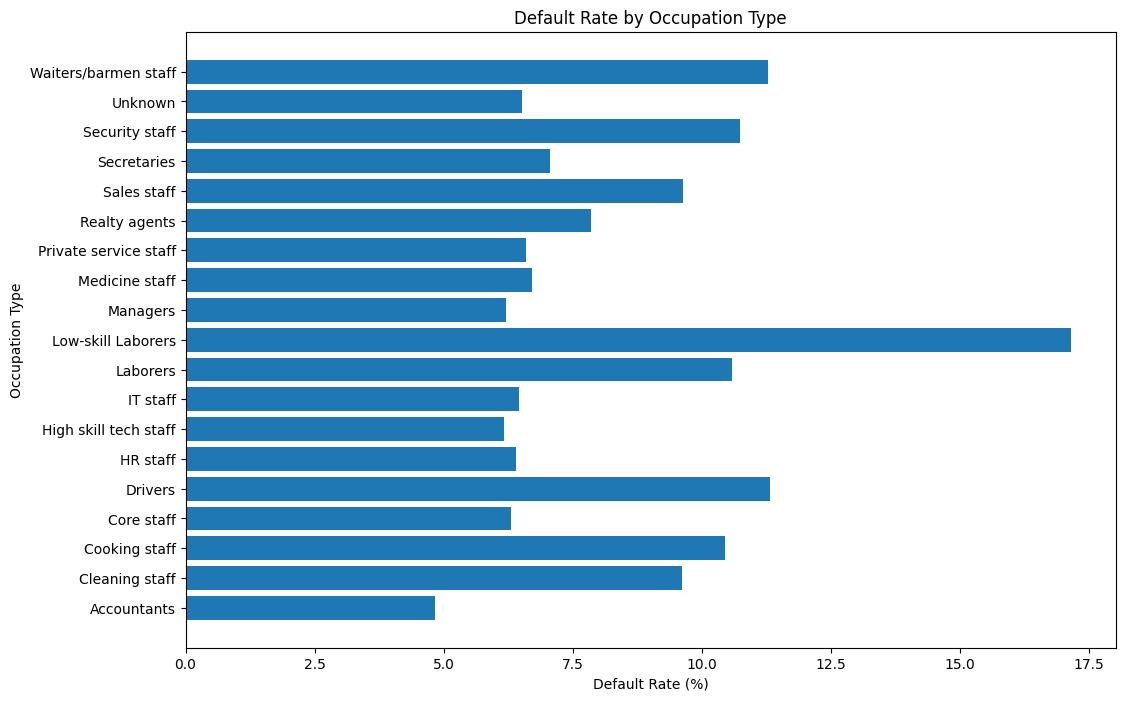

In [78]:
plt.figure(figsize=(12,8))
plt.barh(a.index, a['Default_Rate'])
plt.xlabel("Default Rate (%)")
plt.ylabel("Occupation Type")
plt.title("Default Rate by Occupation Type")
plt.show()

* Low-skill and blue-collar jobs such as low-skill laborers, drivers, and cooking staff show the highest default rates due to income instability
* Sales and cleaning staff show moderate risk
* High-skilled and salaried professionals—such as accountants, managers, IT staff, and medicine staff—have the lowest default rates, indicating stable income and better repayment capability




### **c) Multivariate Analysis**

**Income × Credit × Default**

AMT_INCOME_TOTAL --> continuous

AMT_CREDIT --> continuous

TARGET --> categories (0/1)

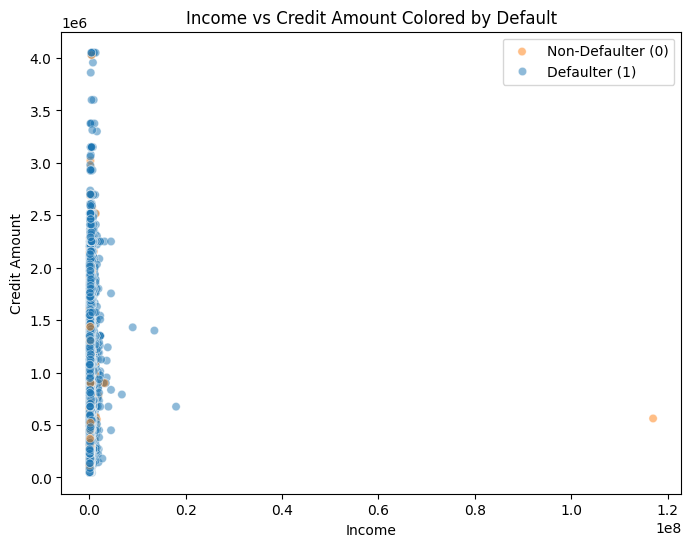

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df1, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', alpha=0.5)
plt.title("Income vs Credit Amount Colored by Default")
plt.xlabel("Income")
plt.ylabel("Credit Amount")
plt.legend(["Non-Defaulter (0)", "Defaulter (1)"])
plt.show()

* Income and Credit Amount have a weak positive relationship
* Both defaulters and non-defaulters overlap heavily, meaning income and credit amount alone do not determine default
* This suggests that we must consider multiple variables together to predict default more accurately

**Age × Occupation × Default**

In [80]:
bins = [20,30,40,50,60,80]
labels = ['20-29','30-39','40-49','50-59','60+']
df1['AGE_GROUP'] = pd.cut(df1['AGE_YEARS'], bins=bins, labels=labels, right=False)

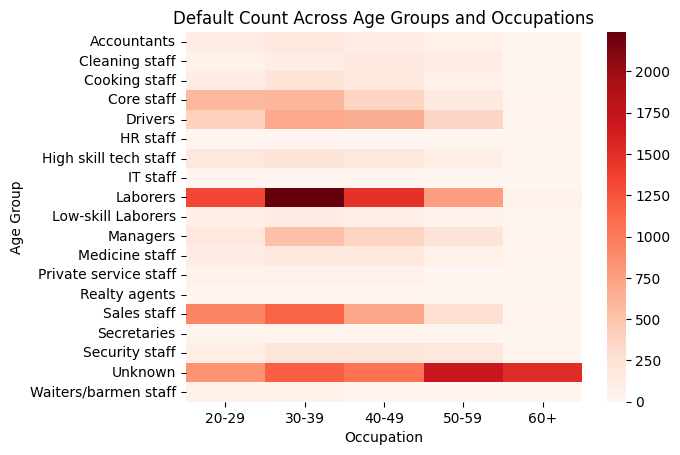

In [81]:
pivot_age_occ = pd.crosstab(df1['OCCUPATION_TYPE'], df1['AGE_GROUP'], values=df1['TARGET'], aggfunc='sum').fillna(0)
sns.heatmap(pivot_age_occ, cmap='Reds')
plt.title("Default Count Across Age Groups and Occupations")
plt.xlabel("Occupation")
plt.ylabel("Age Group")
plt.show()

* Highest defaults occur among 30–39-year-old Laborers. As it shows the darkest colour which indicates strong risk segment
* Drivers, sales staff, and the ‘Unknown’ occupation category also how strong risk patterns across age groups, indicating unstable or lower-income job
* Professionals such as IT staff, accountants, managers, and medical staff consistently show low default counts, reflecting strong income stability

**Housing Conditions × External Scores**

NAME_HOUSING_TYPE --> categorical

EXT_SOURCE --> continuous

TARGET --> categories (0/1)

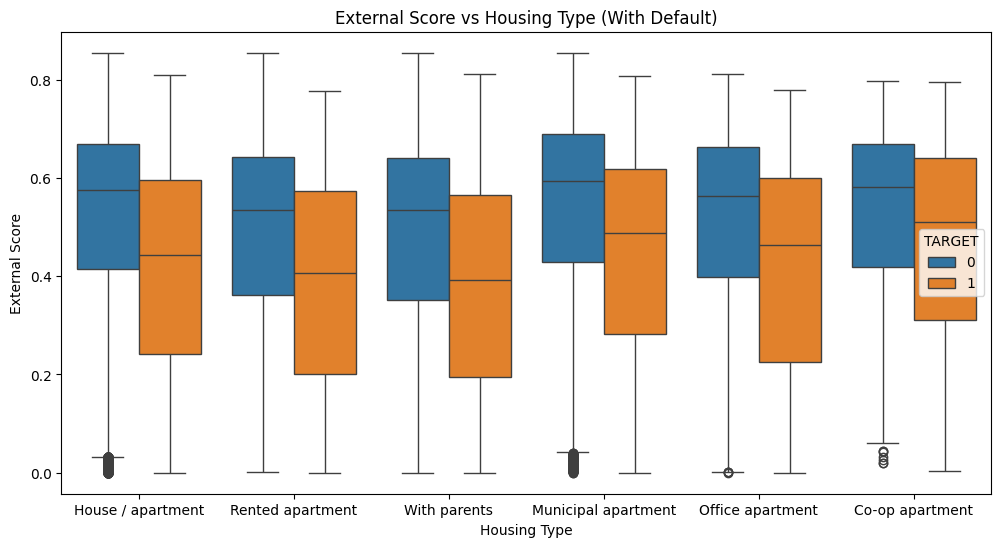

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1, x='NAME_HOUSING_TYPE', y='EXT_SOURCE_2', hue='TARGET')
plt.title("External Score vs Housing Type (With Default)")
plt.xlabel("Housing Type")
plt.ylabel("External Score")
plt.show()

* External Scores are consistently lower for Defaulters (1) than Non-Defaulters (0)
* Low external score = high risk, validates the external score as a strong predictor
* Non-Defaulters have higher median external scores which means people who repay loans tend to have strong external creditworthiness
* Housing type does not drastically change the scoring pattern

**d) Correlation Analysis**

In [83]:
numeric_df = df1.select_dtypes(include=['int64','float64'])

In [84]:
corr = numeric_df.corr()

In [85]:
top_corr = corr['TARGET'].abs().sort_values(ascending=False).head(15)
top_corr

,TARGET
TARGET,1.000000
EXT_SOURCE_2,0.160295
EXT_SOURCE_3,0.155892
AGE_YEARS,0.078239
DAYS_BIRTH,0.078239
DAYS_EMPLOYED,0.074958
EMPLOY_YEARS,0.074958
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055217


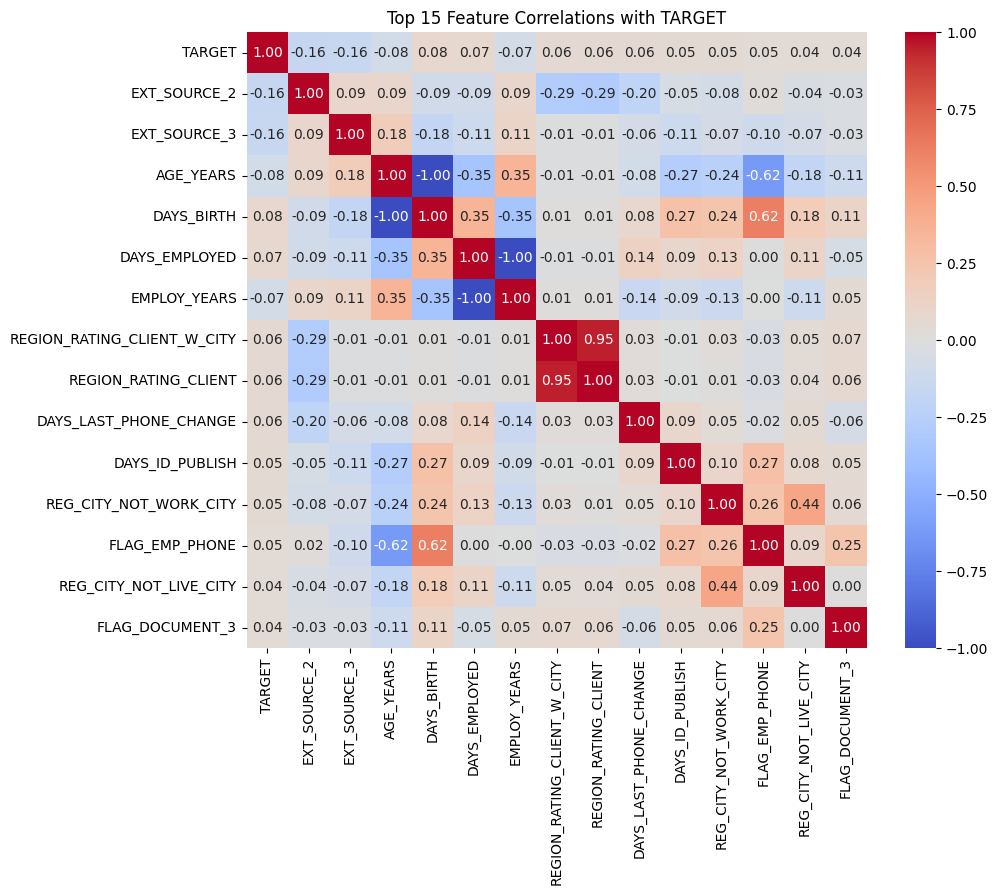

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(corr.loc[top_corr.index, top_corr.index], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 15 Feature Correlations with TARGET")
plt.show()

* Negative correlation: As the feature value increases, probability of default decreases.

* Positive correlation: As the feature increases, probability of default increases.

* EXT_SOURCE_2 and EXT_SOURCE_3 show the strongest correlations, meaning external credit bureau scores are powerful predictors of default
* Age and employment duration also show moderate relationships—older and more stable workers default less

## **3. Hypothesis Testing**

### **Merging datasets**

Aggregating previous loan info per customer
* PREV_COUNT : Total number of past loans for the customer
* PREV_REFUSED : How many of their past loans were refused

In [87]:
prev_summary = df2.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Refused').sum()
}).rename(columns={
    'SK_ID_PREV': 'PREV_COUNT',
    'NAME_CONTRACT_STATUS': 'PREV_REFUSED'})

Merging into main dataset to use previous-loan info for predicting default on the current loan

In [88]:
df1 = df1.merge(prev_summary, on='SK_ID_CURR', how='left')
df1[['PREV_COUNT','PREV_REFUSED']] = df1[['PREV_COUNT','PREV_REFUSED']].fillna(0)       #customers who had no past loans wil become NaN


### **Do defaulters have significantly lower income than non-defaulters?**

**2 sample t-test**

H0: avg(def) - avg(non-def) = 0
--> (no difference in income)

H1: avg(def) - avg(non-def) < 0  --> (defaulters have lower income)

In [90]:
nd = df1[df1['TARGET']==0]['AMT_INCOME_TOTAL']
d = df1[df1['TARGET']==1]['AMT_INCOME_TOTAL']
ssw.ttest_ind(nd, d, value=0, alternative='smaller')

(np.float64(2.208101108469609),
 np.float64(0.9863810195601618),
 np.float64(307509.0))

* As p value > 0.05, we do not reject H0.
* Defaulters and non-defaulters have similar income levels
* Income is not a strong predictor of whether a customer will default

### **Is default rate different across genders?**

**Chi-square test for degree of association**

H0: Gender and default are independent

H1: Default rate differs between genders

In [91]:
gender_ct = pd.crosstab(df1['CODE_GENDER'], df1['TARGET'])
chi2, p, dof, exp = chi2_contingency(gender_ct)
chi2, p

(np.float64(920.7913340361749), np.float64(1.1290217848908289e-200))

* As p value < 0.05, we reject H0
* Default behavior differs significantly between genders

### **Are education level and default correlated?**

**Chi-square test for degree of association**

H0: Default behavior does NOT depend on education level

H1: Default rate changes across education levels

In [92]:
edu_ct = pd.crosstab(df1['NAME_EDUCATION_TYPE'], df1['TARGET'])
chi2, p, dof, exp = chi2_contingency(edu_ct)
chi2, p

(np.float64(1019.2131873088356), np.float64(2.4476812052198174e-219))

* As p value < 0.05, we reject H0
* Education level is associated with default. Some education levels are riskier.

### **Do previous loan rejections predict higher current default probability?**

**2 Sample Proportion Z-test**

H0: Previous loan refusals do not affect current default probability

H1: Customers with previous refusals default more

In [101]:
a1 = df1[df1['PREV_REFUSED'] > 0]['TARGET'].sum()         #Number of defaults among those with previous refusals
b1 = df1[df1['PREV_REFUSED'] > 0].shape[0]                #Total customers with previous refusals
a2 = df1[df1['PREV_REFUSED'] == 0]['TARGET'].sum()        #Number of defaults among those with no refusals
b2 = df1[df1['PREV_REFUSED'] == 0].shape[0]               #Total customers with no refusals
count = [a1, a2]
nobs = [b1, b2]

ssp.proportions_ztest(count, nobs, value=0, alternative='larger')

(np.float64(31.846703925880004), np.float64(7.310738363336254e-223))

* As p value < 0.05, we reject H0
* Customers with previous loan rejections are significantly more likely to default now

### **Is company's default rate higher than industry benchmark?**

**1 sample proportion Z-test**

H0: Company default rate = 8%

H1: Company default rate > 8%

In [105]:
company_default = df1['TARGET'].mean()      #company's actual default rate

In [106]:
company_default

np.float64(0.08072881945686496)

In [107]:
num_defaults = df1['TARGET'].sum()
n = len(df1)

In [104]:
ssp.proportions_ztest(num_defaults, n, value=0.08, alternative='larger')

(np.float64(1.483590906425828), np.float64(0.06895874165711204))

* As p value > 0.05, we do not reject H0
* Company is performing in line with industry standards and does not show higher risk than expected